## 1)

Для начала вспомним известную формулу:

$$f'(x) = [x_0, x_1]f + [x_0, x_1, x_2] f \cdot ((x - x_0) + (x - x_1)) + \dots$$

Так как нас интересует второй порядок точности, то в правой части можно рассмотреть только первые два слашаемых. Далее, нам надо раскрыть разделенные разности. В итоге получим следующее:

$$f'(x) \approx \frac{f(x_1) - f(x_0)}{x_1 - x_0} + \frac{\frac{f(x_2) - f(x_0)}{x_2 - x_0} - \frac{f(x_1) - f(x_0)}{x_1 - x_0}}{x_2 - x_1} \cdot ((x - x_0) + (x - x_1))$$

Обозначения $x_0, x_1, x_2$ не имеют никакого отношения к $x_0$ из условия задачи, поправим полученную формулу:

$$x_0 = x_0 - \frac{h}{\alpha},\;x_1 = x_0,\;x_2 = x_0 + \alpha h$$

Подставляем, получаем следующую формулу:

$$f'(x) = \frac{\alpha \big(f(x_0) - f\big(x_0 - \frac{h}{\alpha}\big)\big)}{h} + \frac{\frac{f(x_0 + \alpha h) - f\big(x_0 - \frac{h}{\alpha}\big)}{\alpha h + \frac{h}{\alpha}} - \frac{f(x_0) - f\big(x_0 - \frac{h}{\alpha}\big)}{\frac{h}{\alpha}}}{\alpha h} \cdot \bigg(2x - 2x_0 + \frac{h}{\alpha}\bigg)$$



Упрощаем:

$$f'(x) = \alpha \cdot \frac{f(x_0) - f(x_0 - \frac{h}{\alpha})}{h} + \bigg(\frac{f(x_0 + \alpha h) - f\big(x_0 - \frac{h}{\alpha}\big)}{\alpha^2 h^2 + h^2} - \frac{f(x_0) - f\big(x_0 - \frac{h}{\alpha}\big)}{h^2}\bigg) \cdot \bigg(2x - 2x_0 + \frac{h}{\alpha}\bigg)$$

Проведем подстановку $x := x_0$

Получится:

$$f'(x_0) = \alpha \cdot \frac{f(x_0) - f(x_0 - \frac{h}{\alpha})}{h} + \bigg(\frac{f(x_0 + \alpha h) - f\big(x_0 - \frac{h}{\alpha}\big)}{\alpha^2 h^2 + h^2} - \frac{f(x_0) - f\big(x_0 - \frac{h}{\alpha}\big)}{h^2}\bigg) \cdot \bigg(\frac{h}{\alpha}\bigg)$$

Упрощаем далее:

$$f'(x_0) = \frac{f(x_0) - f\big(x_0 - \frac{h}{\alpha}\big)}{h} \cdot \bigg(\alpha - \frac{1}{\alpha}\bigg) + \frac{f(x_0 + \alpha h) - f\big(x_0 - \frac{h}{\alpha}\big)}{\alpha^3h + \alpha h}$$

Остановимся на этом.

In [15]:
import numpy as np

def get_f_value(x):
    return np.sin(x)

def get_derivative_f_value(x):
    return np.cos(x)

def get_derivative_f_value_by_formula(x0, alpha, h):
    f = get_f_value
    x0 = np.longdouble(x0)
    alpha = np.longdouble(alpha)
    h = np.longdouble(h)
    ans = np.longdouble(0)
    ans += (alpha - 1 / alpha) * (f(x0) - f(x0 - h / alpha)) / h
    ans += (f(x0 + alpha * h) - f(x0 - h / alpha)) / ((alpha ** 3) * h + alpha * h)
    return ans

Опишем функцию для построения графиков.

In [16]:
import matplotlib.pyplot as plt

def build_plot(xs, ys, xlabel='', ylabel='', title='', filename='plot', plot_labels=None):
    xs = np.array(xs)
    ys = np.array(ys)
    if xs.ndim == 1:
        xs = np.array([xs])
        ys = np.array([ys])
        
    plt.clf()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for ind, (x, y) in enumerate(zip(xs, ys)):
        if plot_labels is not None:
            plt.plot(x, y, label=plot_labels[ind])
        else:
            plt.plot(x, y)
    if plot_labels is not None:
        plt.legend()
    plt.show()

Теперь зафиксируем значение $x_0 := 239$ (плевать на переодичность функции :) )

Также нам нужно рассмотреть несколько значений $\alpha \in [1; 2]$. Пусть это будут $\alpha \in \{1, 1.3, 1.5, 1.7, 2\}$

Наконец, надо выбрать шаг, с которым мы будем перебирать $h \in [10^{-8}; 1]$. Пусть это будет примерно $10^4$ значений, то есть $h \in \{10^{-8} + 10^{-4} \cdot i\;|\;0 \leqslant i < 10^4\}$

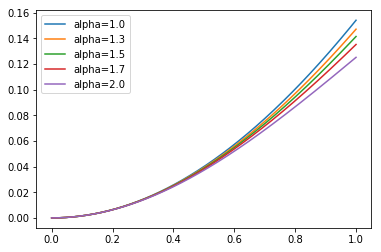

In [17]:
start = np.longdouble(10**(-8))
step = np.longdouble(10**(-4))
x0 = 239

hs = [start + step * i for i in range(10**4)]
alphas = np.longdouble([1, 1.3, 1.5, 1.7, 2])

build_plot([hs for _ in alphas], [[np.abs(get_derivative_f_value(x0) - get_derivative_f_value_by_formula(x0, alpha, h)) for h in hs] for alpha in alphas], 
           plot_labels=['alpha={a}'.format(a = a) for a in alphas])

А теперь поймем, какая оценка на погрешность у нас есть в теории.

Т.к. $\alpha \geq 1$, то $\frac{h}{\alpha} \leq h \alpha$. Тогда наибольший интервал всегда равен $h \alpha$.
То оценка на погрешность $\mathcal{O}((\alpha h)^2)$

## 2А)
Для начала, вычислим точное значение интеграла:
\begin{equation*}
    \int\limits_{-1}^{5}\frac{1}{1 + 9x^2}dx = \bigg(\frac{1}{3}\cdot\arctan{(3x)}\bigg)\bigg{|}_{-1}^{5} 
\end{equation*}

In [18]:
def get_function_value(point):
    point = np.longdouble(point)
    return np.longdouble(1) / (1 + 9 * point ** 2)

In [19]:
import numpy as np

def get_antiderivative_value(point):
    return np.arctan(3 * point) / 3

def get_integral_value(lower, upper):
    return get_antiderivative_value(upper) - get_antiderivative_value(lower)

In [20]:
get_integral_value(-1, 5)

0.9177579784724423

Напишем функцию, которая будет вычислять значение интеграла с помощью составной формулы трапеций (с равными интервалами) и принимать в качестве параметров верхний и нижний пределы, а также количество интервалов.

In [21]:
def get_trapezium_value(lower, upper, number_of_intervals):
    H = np.longdouble(upper - lower) / number_of_intervals
    total_sum = np.longdouble(get_function_value(lower) + get_function_value(upper)) / 2
    for ind in range(1, number_of_intervals):
        total_sum += get_function_value(lower + ind * H)
    return total_sum * H

In [22]:
get_trapezium_value(-1, 5, 1000)

0.9177574331890031215

Теперь напишем функцию, которая будет считать значение интеграла с помощью составной формулы Симпсона (с равными интервалами) и принимать в качестве параметров верхний и нижний пределы, а также количество интервалов.

In [23]:
def get_simpson_value(lower, upper, number_of_intervals):
    H = np.longdouble(upper - lower) / number_of_intervals
    total_sum = np.longdouble(0)
    for ind in range(2 * number_of_intervals + 1):
        current_point = lower + ind * H / 2
        coef = 1 if ind == 0 else 1 if ind == 2 * number_of_intervals else 2 if ind % 2 == 0 else 4
        total_sum += coef * get_function_value(current_point)
    return total_sum * H / 6

In [24]:
get_simpson_value(-1, 5, 1000)

0.9177579784717422123

Теперь построим интересующие нас графики погрешностей. 

#### Формула трапеций

Для начала рассмотрим пару графиков в разном масштабе.

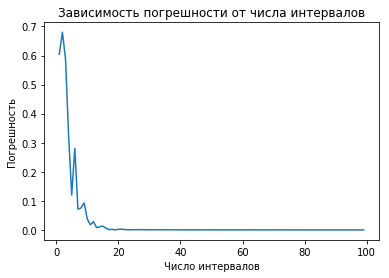

In [23]:
integral_value = get_integral_value(-1, 5)
xs = range(1, 100)
ys = [np.abs(integral_value - get_trapezium_value(-1, 5, x)) for x in xs]
build_plot(xs, ys, 'Число интервалов', 'Погрешность', 'Зависимость погрешности от числа интервалов')

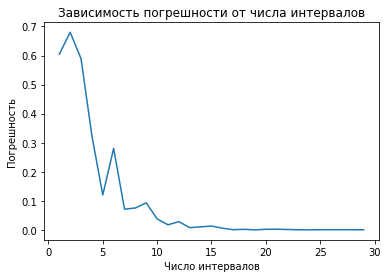

In [16]:
integral_value = get_integral_value(-1, 5)
xs = range(1, 30)
ys = [np.abs(integral_value - get_trapezium_value(-1, 5, x)) for x in xs]
build_plot(xs, ys, 'Число интервалов', 'Погрешность', 'Зависимость погрешности от числа интервалов')

Здесь и далее, $n$ будет обозначать число интервалов.

Теперь проделаем действия, чтобы сравнить с теоретической оценкой:
\begin{equation*}
|R_t[f]| \leqslant A_2 \cdot \frac{(b - a)}{12} H^2
\end{equation*}
В нашем случае, имеем функцию:
\begin{equation*}
|R_t[f]| \leqslant A_2 \cdot \frac{1}{2} \cdot \bigg(\frac{6}{n}\bigg)^2
\end{equation*}

$$A_2 = \max\limits_{[a; b]}|f^{(2)}(x)|,\;\;f(x) = \frac{1}{1 + 9x^2}$$

Не будем вычислять $A_2$ явно, учитывая, что это просто какая-то константа. Нас же интересует, ведет ли себя погрешность примерно как $\frac{1}{n^2}$ или нет.

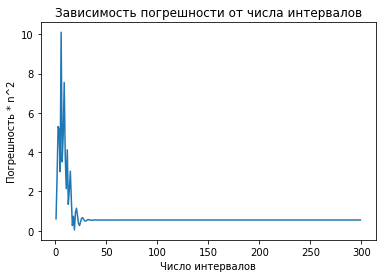

In [121]:
integral_value = get_integral_value(-1, 5)
xs = range(1, 300, 1)
ys = [np.abs(integral_value - get_trapezium_value(-1, 5, x)) * x ** 2 for x in xs]
build_plot(xs, ys, 'Число интервалов', 'Погрешность * n^2', 'Зависимость погрешности от числа интервалов')

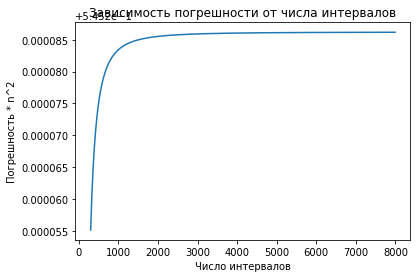

In [124]:
integral_value = get_integral_value(-1, 5)
xs = range(300, 8000, 10)
ys = [np.abs(integral_value - get_trapezium_value(-1, 5, x)) * x ** 2 for x in xs]
build_plot(xs, ys, 'Число интервалов', 'Погрешность * n^2', 'Зависимость погрешности от числа интервалов')

Изучим два графика вида $n^2 \cdot $ погрешность. По ним видно, что начиная с некоторого места частное погрещности и $\frac{1}{n^2}$ стремится снизу к некоторой прямой, что соответствует тому, что погрешноть $\leq\frac{\texttt{const}}{n^2}$, при этом она становится к ней все ближе и ближе.

#### Формула Симпсона

Опять таки, для начала рассмотрим пару графиков в разном масштабе.

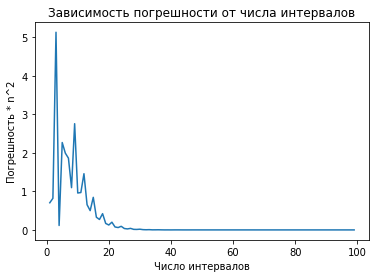

In [111]:
integral_value = get_integral_value(-1, 5)
xs = range(1, 100)
ys = [np.abs(integral_value - get_simpson_value(-1, 5, x)) * x ** 2 for x in xs]
build_plot(xs, ys, 'Число интервалов', 'Погрешность', 'Зависимость погрешности от числа интервалов')

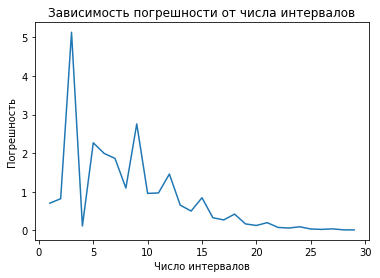

In [112]:
integral_value = get_integral_value(-1, 5)
xs = range(1, 30)
ys = [np.abs(integral_value - get_simpson_value(-1, 5, x)) * x ** 2 for x in xs]
build_plot(xs, ys, 'Число интервалов', 'Погрешность', 'Зависимость погрешности от числа интервалов')

Хотим сравнить с известной из теории оценкой:
\begin{equation*}
|R_s[f]| \leqslant A_4 \cdot \frac{(b - a)}{180} h^4
\end{equation*}
В нашем случае, имеем функцию:
\begin{equation*}
|R_s[f]| \leqslant A_4 \cdot \frac{1}{30} \bigg(\frac{3}{n}\bigg)^4
\end{equation*}

$$A_4 = \max\limits_{[a; b]}|f^{(4)}(x)|,\;\;f(x) = \frac{1}{1 + 9x^2}$$

Опять таки, не станем вычислять точное значение $A_4$, лучше посмотрим на графики вида  $n^4\cdot\;$ порешность

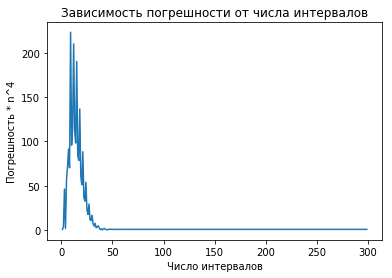

In [122]:
integral_value = get_integral_value(-1, 5)
xs = range(1, 300, 1)
ys = [np.abs(integral_value - get_simpson_value(-1, 5, x)) * x ** 4 for x in xs]
build_plot(xs, ys, 'Число интервалов', 'Погрешность * n^4', 'Зависимость погрешности от числа интервалов')

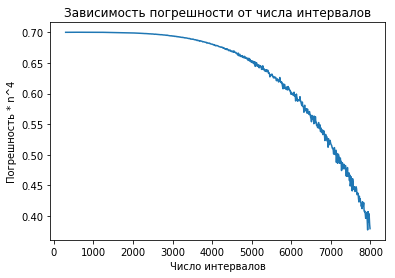

In [123]:
integral_value = get_integral_value(-1, 5)
xs = range(300, 8000, 10)
ys = [np.abs(integral_value - get_simpson_value(-1, 5, x)) * x ** 4 for x in xs]
build_plot(xs, ys, 'Число интервалов', 'Погрешность * n^4', 'Зависимость погрешности от числа интервалов')

Видим, что наша погрешность при достаточно больших количествах интервалов асимптотически меньше, чем $\frac{1}{n^4}$

## 2B

Нам нужно рассмотреть $H_1 = 2H_2$ - некоторый шаг для вычислений.
Если у нас было $n$ интервалов, то для данного интеграла $H_1 = \frac{6}{n}$
После чего мы можем оценить:

$$C \approx \frac{1}{3H_2^2} \cdot \big(S_{H_2}(f) - S_{H_1}(f)\big) = \frac{n^2}{27} \cdot \big(S_{H_2}(f) - S_{H_1}(f)\big)$$

После чего мы для $\varepsilon = 10^{-6}$, мы можем выбрать $H$ из неравенства:

$$|CH^2| \leqslant \varepsilon \Rightarrow H \leq \sqrt{\frac{\varepsilon}{C}}$$

Остается написать программу, вычисляющую данные значения и сравнить с теоретическим.

In [93]:
def get_step_theory(eps=np.longdouble(10**(-6)), n=5000):
    h1 = np.longdouble(6) / n
    h2 = h1 / 2
    C = np.longdouble(n**2) / 27 * (get_trapezium_value(-1, 5, n * 2) - get_trapezium_value(-1, 5, n))
    H1 = np.sqrt(np.abs(eps / C))
    return H1

In [102]:
print(get_step_theory())
print(get_step_theory(n=10000))

0.008125293114002463323
0.008125292333912749763


In [104]:
def get_step_practice(eps=np.longdouble(10**(-6))):
    n = 1
    integral_value = get_integral_value(-1, 5)
    while True:
        diff = np.abs(integral_value - get_trapezium_value(-1, 5, n))
        if diff < np.longdouble(10 ** (-6)):
            print(n)
            return np.longdouble(6) / n
        n += 1
    return 1e18 # just return

In [105]:
get_step_practice()

739


0.008119079837618403248

In [106]:
print(6 / get_step_theory())
print(6 / get_step_theory(n=10000))

738.4348990019932217
738.43496989734629604


На самом деле понятно, что в обоих способах вычисления могли возникнуть потери точности и сравнивать вещественные числа не очень правильно, но в данном случае ими можно принебречь.

Заметим, что мы получили примерно равный теоретическому значению шаг, но при этом несколько меньший. С одной стороны мы получаем, что наша оценка досаточно точная. Более того, если рассчитать $n$ исходя из теоретического значения, мы получим, что первое удовлетворяющее оценке целое $n$ в точности совпадает с рассчитанным на практике значением. Тем не менее, теоретическая оценка все таки сверху и гарантий, что она будет подобным образом (с округлением до целого) с практически рассчитаным значением нет.

Также оценка $C$ при достаточно больших $n$ примерно одинаковая (в нашем случае при $n = 5000$ и $n=10^{4}$).

## 2C)

Напишем программу для рассчета весов.

In [ ]:
def get_weight(lower=-1, upper=5, number_of_weights):
    h = np.longdouble(upper - lower) / number_of_weights
    

Как можно использовать информацию о том, что веса становятся отрицательными? Как мы помним, когда возникает вычитание (в данном случае, возможно, близких по модулю чисел), появляется и существенная потеря точности. По этому использовать формулу с отрицательными весами не стоит.